In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset= pd.read_csv('hotel_booking.csv')

In [3]:
dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
dataset['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

In [5]:
dataset.shape

(119390, 36)

In [6]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
dataset['reservation_status_date']=pd.to_datetime(dataset['reservation_status_date'])

In [9]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
dataset.drop(columns=['company','agent'],inplace=True)

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,81234,115425,118898,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,669-792-1661,************3627
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,48,6,1,28


In [13]:
for col in dataset.describe(include=object).columns:
  print(col)
  print(dataset[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' '

In [14]:
dataset=dataset[dataset['adr']<5000]

<Axes: >

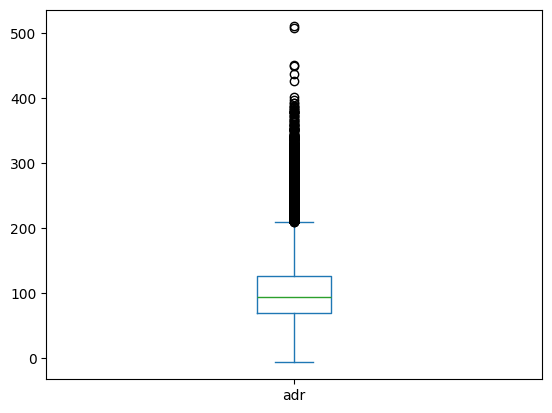

In [15]:
dataset['adr'].plot(kind='box')

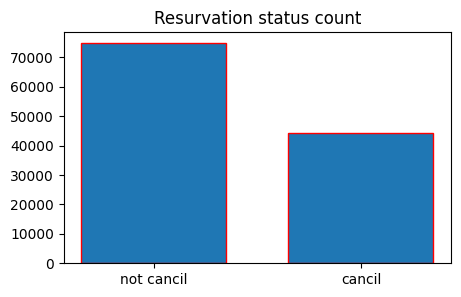

In [16]:
plt.figure(figsize=(5,3))
plt.title('Resurvation status count')
plt.bar(['not cancil','cancil'],dataset['is_canceled'].value_counts(),edgecolor='r',width=0.7)
plt.show()

Text(0, 0.5, 'number of reservation')

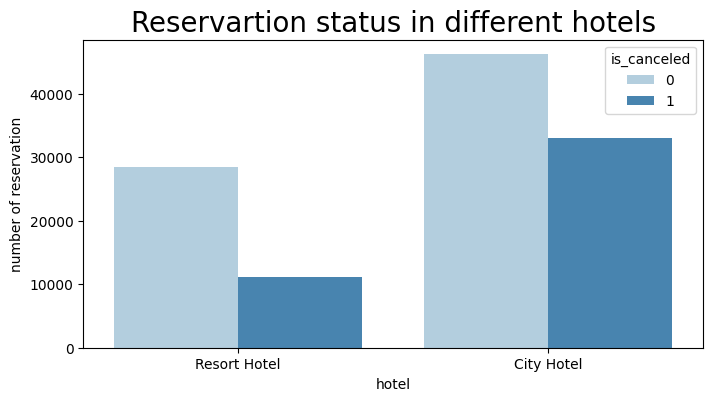

In [17]:
plt.figure(figsize=(8,4))
axl=sns.countplot(x='hotel',hue='is_canceled',data=dataset ,palette='Blues')
legned_labels,_=axl.get_legend_handles_labels()
# axl.legend(bbox_to_anchor(1,1))
plt.title('Reservartion status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservation')

In [18]:
resort_hotel= dataset[dataset['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [19]:
city_hotel= dataset[dataset['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [20]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()



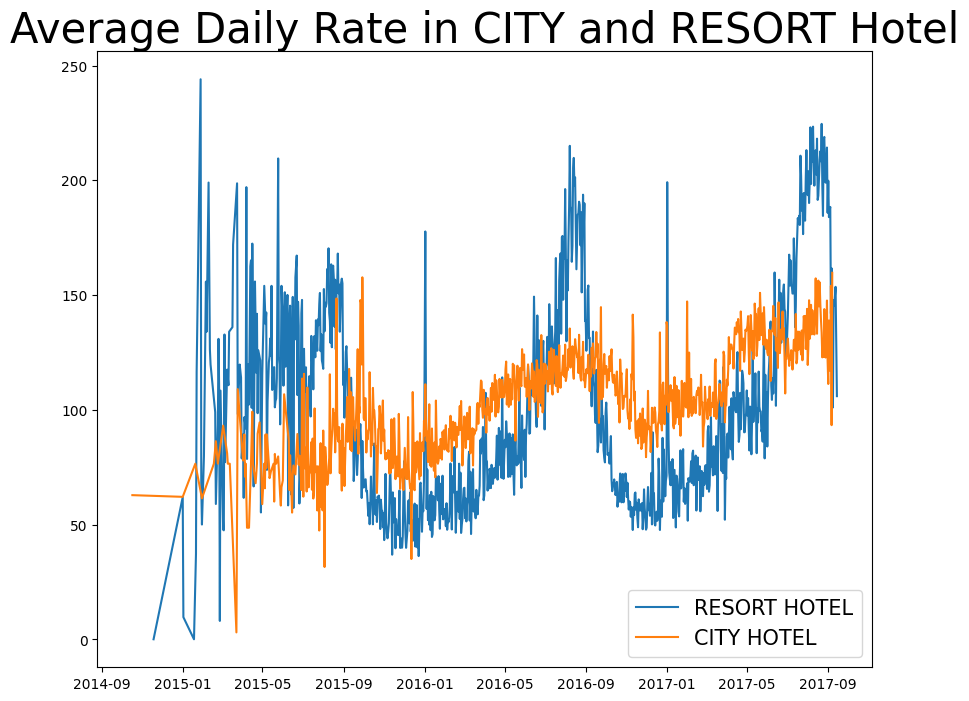

In [21]:
plt.figure(figsize=(10,8))
plt.title('Average Daily Rate in CITY and RESORT Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='RESORT HOTEL')
plt.plot(city_hotel.index,city_hotel['adr'],label='CITY HOTEL')
plt.legend(fontsize=15)
plt.show()

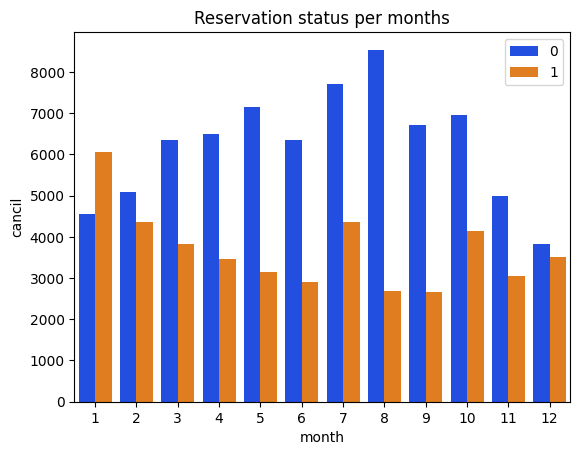

In [22]:
dataset['month'] = dataset['reservation_status_date'].dt.month
sns.countplot(x='month',data=dataset,hue='is_canceled',palette='bright')
plt.xlabel('month')
plt.ylabel('cancil')
plt.legend(fontsize=10,)
plt.title('Reservation status per months')
plt.show()



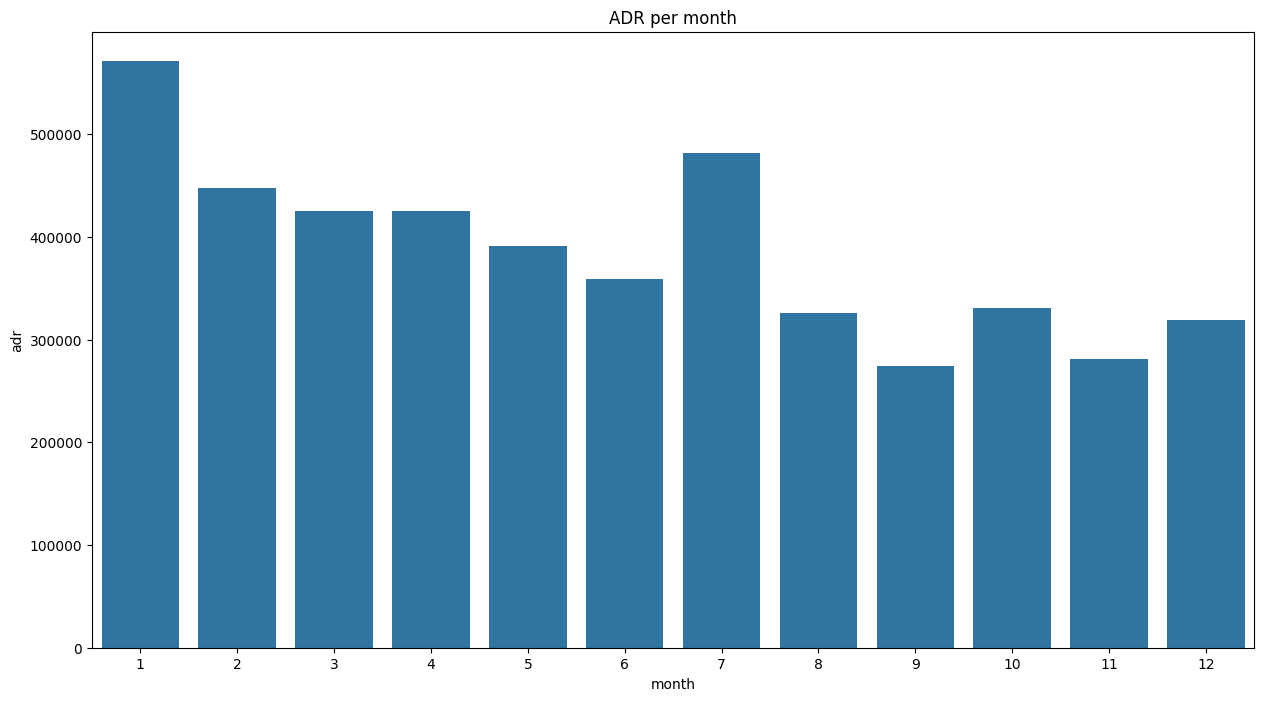

In [30]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month')
sns.barplot(x='month', y='adr', data=dataset[dataset['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()


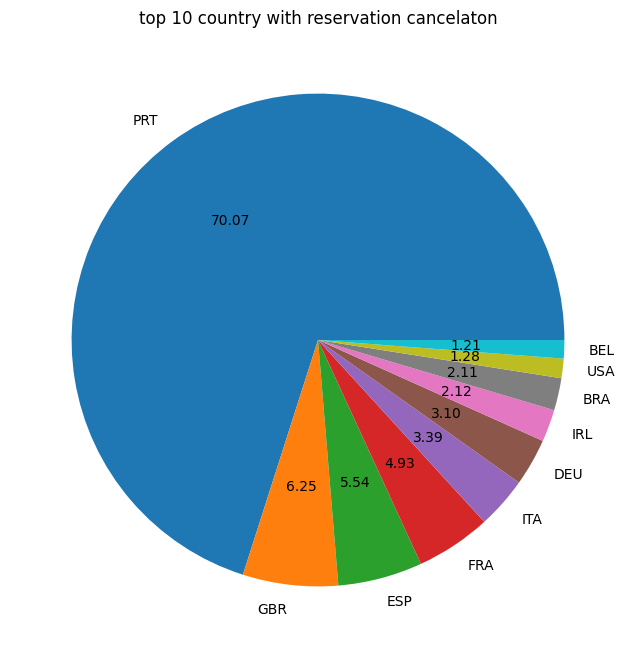

In [43]:
plt.figure(figsize=(8,8))
canciled=dataset[dataset['is_canceled']==1]
top_country=canciled['country'].value_counts()[:10]
plt.title('top 10 country with reservation cancelaton')
plt.pie(top_country,autopct='%.2f',labels=top_country.index)
plt.show()


In [45]:
plt.figure(figsize=(8,8))
canciled=dataset[dataset['is_canceled']==1]
canciled['']
plt.plot()


country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

In [52]:
dataset['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [62]:
a=dataset[dataset['is_canceled']==1].count()
f=dataset[dataset['is_canceled']==1]
k=f['adr'].sum()
print('each canciled ticket is of rupeed',k/a)



each canciled ticket is of rupeed hotel                             104.917985
is_canceled                       104.917985
lead_time                         104.917985
arrival_date_year                 104.917985
arrival_date_month                104.917985
arrival_date_week_number          104.917985
arrival_date_day_of_month         104.917985
stays_in_weekend_nights           104.917985
stays_in_week_nights              104.917985
adults                            104.917985
children                          104.917985
babies                            104.917985
meal                              104.917985
country                           104.917985
market_segment                    104.917985
distribution_channel              104.917985
is_repeated_guest                 104.917985
previous_cancellations            104.917985
previous_bookings_not_canceled    104.917985
reserved_room_type                104.917985
assigned_room_type                104.917985
booking_changes      

In [63]:
a=dataset[dataset['is_canceled']==0].count()
f=dataset[dataset['is_canceled']==0]
k=f['adr'].sum()
print('each canciled ticket is of rupeed',k/a)



each canciled ticket is of rupeed hotel                             100.210618
is_canceled                       100.210618
lead_time                         100.210618
arrival_date_year                 100.210618
arrival_date_month                100.210618
arrival_date_week_number          100.210618
arrival_date_day_of_month         100.210618
stays_in_weekend_nights           100.210618
stays_in_week_nights              100.210618
adults                            100.210618
children                          100.210618
babies                            100.210618
meal                              100.210618
country                           100.210618
market_segment                    100.210618
distribution_channel              100.210618
is_repeated_guest                 100.210618
previous_cancellations            100.210618
previous_bookings_not_canceled    100.210618
reserved_room_type                100.210618
assigned_room_type                100.210618
booking_changes      